In [483]:
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import pyplot as PLT
from sklearn.metrics.pairwise import euclidean_distances
import sklearn

In [484]:
path = "/Users/guilhermeviveiros/Desktop/Face_Regonition/mlFacesResized/"

In [485]:
def getExtension(filename):
   fileName, fileExtension = os.path.splitext(filename)
   return fileExtension

def inArray(array, to_look):
    for x in array:
	    if(to_look[1:] == x):
		    return True

def isImage(filename):
   # Extensions to search
   extensions = ['jpeg', 'jpg', 'jpe','png'];
   extension = getExtension(filename)
   if (inArray(extensions, extension)):
       return True
   return False

In [486]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 45 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

def set_dataset(path,number_images_train,number_images_test, width, height):
    
    #o 3 vem do RGB
    train_set = np.empty(shape=(number_images_train,width,height,3));
    test_set = np.empty(shape=(number_images_test,width,height,3));
    answer_test = [];
    
    
    mlfaces = os.listdir(os.path.expanduser(
        path
    ))
    
    tmp_train_set = 0;
    tmp_test_set = 0;
    
    for user in mlfaces:
        
        if not user == ".DS_Store"  and not user == "random" :
            
            user_images = os.listdir(os.path.expanduser(
                path + user
            ))
            
            tmp = 1;
            
            
            for image in user_images:
            
                
                if(isImage(image)):
        
                    image_path = path + user + "/" + image
                    #print(image_path)
                    #print(image_path)
                
                    im = mpimg.imread(image_path)
                    
                    
                    if(tmp < 9):
                        train_set[tmp_train_set] = im;
                        tmp_train_set = tmp_train_set+1;
                    else : 
                        test_set[tmp_test_set] = im;
                        answer_test.append(user);
                        tmp_test_set = tmp_test_set+1;
                        
                        
                    tmp = tmp+1
    
    #APENAS PARA GUILHERME NUNES DIRECTORY
    for user in mlfaces:
        if user == "random":
            
            user_images = os.listdir(os.path.expanduser(
                path + user
            ))
            
            for image in user_images:
                if(isImage(image)):
                    image_path = path + user + "/" + image
                    im = mpimg.imread(image_path)
                    test_set[tmp_test_set] = im
                    tmp_test_set = tmp_test_set+1;
                    
                    if "guilherme" in image:
                        answer_test.append("guilherme")
                    if "none" in image:
                        answer_test.append("none")
                    if "rc" in image:
                        answer_test.append("rc")    
    
                
    return train_set,test_set,answer_test;


In [487]:
# trainset constituido por 8 imagens de cada elemento(somos 5 por agora) 40 imagens
# test set consituido por 2 imagens de cada elemento
# cada imagem tem dimensão  de 1536 × 2048 

train_set,test_set,answer_test = set_dataset(path,40,20,255,255);

#temos 10 imagens adicionais no test_set, imagens random que arranjei, só estão na diretoria de Guilherme Nunes
#para remover essa opção remova as ultimas linhas de setdataset

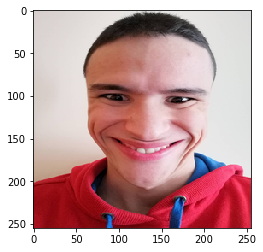

In [488]:

##### OUTLIERS REFERENTES A CARAS XDDDDDD #######

plt.imshow(test_set[1].reshape(255,255,3))

In [489]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
#print(answer_test)

Train set with a shape of -> (40, 255, 255, 3)
Test set with a shape of -> (20, 255, 255, 3)


In [490]:
#1) calcular a matriz de covariancia

#temos que ter 45 amostras, cada amostra com a sua respeitva coluna, logo vou passar de (2048,1536,3) para (2048*1536*3)
train_set = train_set.reshape(train_set.shape[0], (train_set.shape[1]*train_set.shape[2]*train_set.shape[3]))
test_set = test_set.reshape(test_set.shape[0], (test_set.shape[1]*test_set.shape[2]*test_set.shape[3]))

In [491]:
print("Train set with a shape of -> " + str(train_set.shape))
print("Test set with a shape of -> " + str(test_set.shape))
#cada amostra/linha tem todas as suas features representadas por coluna (pixeis)

Train set with a shape of -> (40, 195075)
Test set with a shape of -> (20, 195075)


In [492]:
#centralizar a matriz e fazer svd , depois valores singulares ^2 = valores proprios
means = np.mean(train_set,axis = 0)

In [493]:
means.shape

(195075,)

In [494]:
#subtraio a cada atributo pela sua média
train_set = train_set - means
print(train_set.shape)

(40, 195075)


In [495]:
#quero que os vetores próprios deem -> M por N (N -> numero de elementos) (m -> atributos)
vet_prop, val_sing, v = np.linalg.svd(train_set.T,full_matrices=False)

In [496]:
val_prop = val_sing #* val_sing

In [497]:
print(vet_prop.shape)
print(val_prop.shape)
print(val_prop)

(195075, 40)
(40,)
[4.39719360e+02 2.73301485e+02 1.67127836e+02 1.50827492e+02
 1.08584481e+02 8.74990245e+01 8.13350750e+01 7.88017325e+01
 6.96392089e+01 6.80102864e+01 6.38640392e+01 6.00128964e+01
 5.84543831e+01 5.65968659e+01 5.20384612e+01 5.08951764e+01
 4.94098130e+01 4.70112421e+01 4.67929785e+01 4.31935154e+01
 4.16217952e+01 4.12081644e+01 3.91289184e+01 3.82947162e+01
 3.67929531e+01 3.54184425e+01 3.47959042e+01 3.43464798e+01
 3.32689115e+01 3.25904435e+01 3.04820763e+01 2.96649998e+01
 2.86908276e+01 2.86588537e+01 2.77260222e+01 2.49233430e+01
 2.33344293e+01 2.16797265e+01 1.48445360e+01 7.67079707e-14]


In [498]:
#2) ver quantos valores próprios é que são relevantes
diag = np.sum(val_prop)
confianca_alvo = 0.9
k = 0
confianca = 0
while confianca < confianca_alvo:
    confianca= confianca + (val_prop[k]/diag)
    k += 1
k, confianca

(29, 0.9009293910469753)

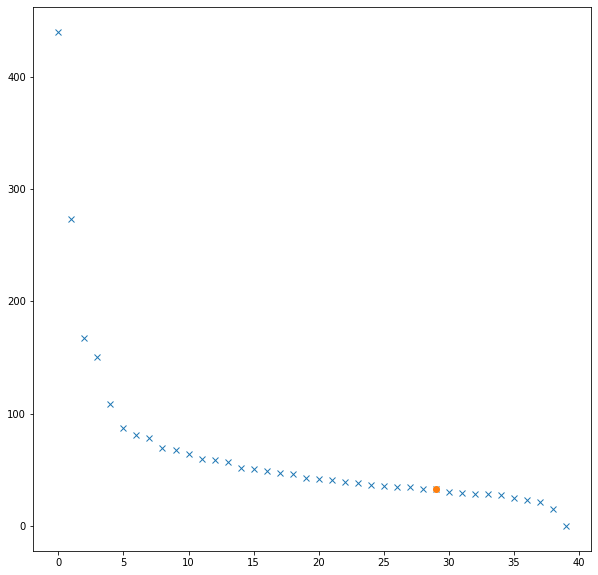

In [499]:
plt.figure(figsize=(10,10))
M = 40 #representa o número de valores próprios
t = np.arange(0, M, 1)
plt.plot(t, val_prop, 'x')
plt.plot(k, val_prop[k], 'o')
plt.show()

In [500]:
#podemos reparar pelo método do cotovelo que com 3 vetores próprios temos uma boa representação do conjunto de imagens
#observemos em baixo os primeiros vetores próprios(aqueles que representam melhor o dataset)
print(vet_prop.shape)

(195075, 40)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(*args, **kw)>

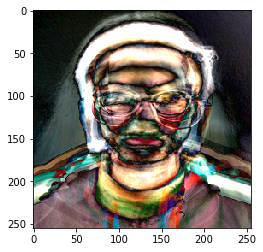

In [501]:
#display(plt.matshow(np.reshape(v[0], (255,255,3)), cmap='gray'))
from matplotlib import pyplot as PLT

PLT.imshow(np.abs(np.reshape(vet_prop[:,4],(255,255,3))*255))
PLT.show

#### Agora retira-se os vetoes que representam melhor o dataset e procede-se com as projeções

In [502]:
W = vet_prop[0:,:k]

In [503]:
print(W.shape)
print(train_set.shape)

(195075, 29)
(40, 195075)


In [504]:
train_setT = train_set.T

In [505]:
#cada imagem tem associado 29 pontos representante da sua projecao, temos 29 projecoes
projecao_interna = np.dot(train_set,W)
print(projecao_interna.shape)

(40, 29)


In [506]:
#Centro o testset de acordo com o trainset
test_set = test_set - means
print(test_set.shape)

(20, 195075)


In [507]:
projecao_test = np.dot(test_set, W)
print(projecao_test.shape)

(20, 29)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


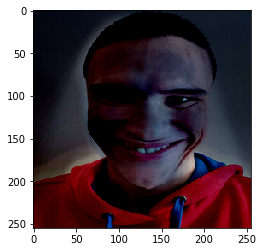

In [508]:
#I will test with this image
#fica assim porque os pixeis estão centrados
plt.imshow(test_set[1].reshape(255,255,3))

In [509]:
ll = np.linalg.norm(projecao_interna[0] - projecao_test[0])
print(ll)

87.05263024218364


## Cálculo das distancias entre imagen

In [510]:
def norm_metric():

    dist = np.zeros(shape=(20,40))
    d_min = np.zeros(shape=(20))

    for i in range(0,test_set.shape[0]):
        #norma das coordendas da imagem de teste e as imagens representativas do data set
        #cada i, que representa uma imagem do testset terá 45 valores, representatnes da norma entra a imagem de teste
        #e a imagem de treino(45 imagens)
        dist[i] = [np.linalg.norm(projecao_interna[l] - projecao_test[i]) for l in range(40)]
    
        #depois escolhemos o valor mais próximo
        d_min[i] = np.min(dist[i])
        
    return dist,d_min

In [511]:
def euclidian_metric():

    dist = np.zeros(shape=(20,40))
    d_min = np.zeros(shape=(20))
    
    for i in range(0,test_set.shape[0]):
        #norma das coordendas da imagem de teste e as imagens representativas do data set
        #cada i, que representa uma imagem do testset terá 45 valores, representatnes da norma entra a imagem de teste
        #e a imagem de treino(45 imagens)
        dist[i] = [euclidean_distances(projecao_interna[l].reshape(1,-1), projecao_test[i].reshape(1,-1))[0][0] for l in range(40)]
    
        #depois escolhemos o valor mais próximo
        d_min[i] = np.min(dist[i])
        
    return dist,d_min

In [546]:
def mahalanobis_metric():

    dist = np.zeros(shape=(20,40))
    d_min = np.zeros(shape=(20))
    
    for i in range(0,test_set.shape[0]):
        #norma das coordendas da imagem de teste e as imagens representativas do data set
        #cada i, que representa uma imagem do testset terá 45 valores, representatnes da norma entra a imagem de teste
        #e a imagem de treino(45 imagens)
        dist[i] = [sklearn.metrics.pairwise_distances(projecao_interna[l].reshape(1,-1), projecao_test[i].reshape(1,-1),metric="mahalanobis")[0][0] for l in range(40)]
    
        #depois escolhemos o valor mais próximo
        d_min[i] = np.min(dist[i])
        
    return dist,d_min

In [547]:
x = projecao_interna[30].reshape(1,-1)
print(np.abs(x))
print(np.abs(y))


y = projecao_test[0].reshape(1,-1)
sklearn.metrics.pairwise_distances(x,y,metric="mahalanobis")

[[19.25230148 27.7280602  64.22489208 16.03966435 45.98120425  3.1984065
  26.74952973  0.29704141 17.60900201 21.16074029 20.02681637  6.66631083
   7.17232973 21.7644401   1.95389008  4.43012582  6.79728015  3.23595854
   8.30910414  0.54765546  1.79418171  0.21523505  0.61226264  0.11201499
   1.19766382  0.31489519  1.56898941  0.41052608  1.49244278]]
[[18.41396913 65.41688649 11.21370741  1.46065493 16.46650395 28.43719054
  24.25326819 40.12235612  3.32949795  6.26116634  1.2047491   2.08580296
   3.42754788  5.48150504  4.5294668   4.4161126   4.42618733  4.16656419
   2.00418464  2.41179827  3.39564101  1.73820901  7.6406382   1.83016599
   2.470323    0.21879582  0.34469956  2.17236489  2.3485947 ]]


array([[nan]])

## Estes pontos representam a distancia minima entre as imagens de teste e imagens de treino
### Apesar disso, queremos os indexes dos pontos para podermos saber quais imagens é que representam o que :)


[21.5156734  32.98058142 14.38763603 20.47230013 10.87637651 17.00965029
 52.90612606 42.46234649 36.66970797 38.46710004 71.79978286 58.63315263
 69.73848181 69.65004912 83.70621042 83.70621042 55.29256126 83.70621042
 49.39323118 50.15592356]


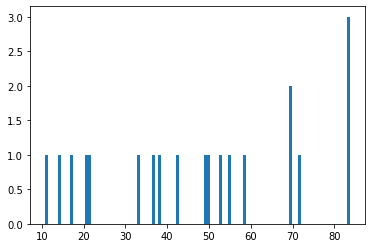

{'whiskers': [<matplotlib.lines.Line2D at 0x1101745c0>,
 'caps': [<matplotlib.lines.Line2D at 0x110626cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11fac5198>],
 'medians': [<matplotlib.lines.Line2D at 0x110626630>],
 'fliers': [<matplotlib.lines.Line2D at 0x110626710>],
 'means': []}

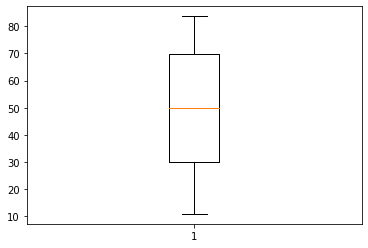

In [514]:
dist,d_min = norm_metric()
print(d_min)

#Temos que arranjar um valor para defenir um treshold, uma distancia máxima, caso passe não é nenhum dos elementos e questão
histogram_example = plt.hist(d_min, bins=100)
plt.show()
plt.boxplot(d_min)

In [515]:
len(dist) #45 pontos relativos à imagem

20

In [559]:
def indexes(dist):
    ind = []
    for i in range(0,dist.shape[0]):
        if(d_min[i] >= 80):
            ind.append(100)
        else:
            ind.append(np.argmin(dist[i]))
        #diz o índice o elemento mínimo correspondentes à distancia

    return ind

In [560]:
#Com este indice consigo ver qual o elemento
#devido à organização das pastas é possível separar o indíce desta maneira
def ind_to_name(ind):
    ind = ind+1;
    if ind < 9  :
        tmp = "andrade"
        #break;
    elif ind < 17:
        tmp = "gabi"
        #break;
    elif ind < 25:
        tmp = "guilherme"
        #break;
    elif ind < 33:
        tmp = "rc"
        #break;
    elif ind < 41:
        tmp = "rui"
        #break;
    else:
       tmp = "Não existe no dataset"
    return tmp

In [561]:
def predict(ind):
    tmp = 1
    for i in range(0,len(ind)):
        name = ind_to_name(ind[i])
    
        if(name == answer_test[i]):
            print("Image " + str(tmp) + " is ok!")
            print("Image of -> " + str(answer_test[i]))
            print("Predicted -> " + name)
            print("Distance of " + str(d_min[i]))
            print("\n\n")
        else:
            print("Image " + str(tmp) + " isnt ok!")
            print("Image of -> " + str(answer_test[i]))
            print("Predicted -> " + name)
            print("Distance of " + str(d_min[i]))
            print("\n\n")
    
        tmp+=1


In [562]:
dist,d_min = norm_metric()
ind = indexes(dist)
predict(ind)

Image 1 is ok!
Image of -> andrade
Predicted -> andrade
Distance of 21.51567340407859



Image 2 is ok!
Image of -> andrade
Predicted -> andrade
Distance of 32.980581422521034



Image 3 is ok!
Image of -> gabi
Predicted -> gabi
Distance of 14.387636029976708



Image 4 is ok!
Image of -> gabi
Predicted -> gabi
Distance of 20.47230012532028



Image 5 is ok!
Image of -> guilherme
Predicted -> guilherme
Distance of 10.876376509405238



Image 6 is ok!
Image of -> guilherme
Predicted -> guilherme
Distance of 17.009650291224606



Image 7 is ok!
Image of -> rc
Predicted -> rc
Distance of 52.9061260600388



Image 8 is ok!
Image of -> rc
Predicted -> rc
Distance of 42.46234649285541



Image 9 is ok!
Image of -> rui
Predicted -> rui
Distance of 36.66970797104269



Image 10 is ok!
Image of -> rui
Predicted -> rui
Distance of 38.467100044221624



Image 11 is ok!
Image of -> guilherme
Predicted -> guilherme
Distance of 71.79978286055373



Image 12 is ok!
Image of -> guilherme
Predicted -> 

## Uma visualização em 2D, apesar de não ser o correto pois utilizamos 29 dimensões

In [563]:
def identify(img):
    
    test_coef_proj = np.dot(img, W)
    return test_coef_proj[0:2]

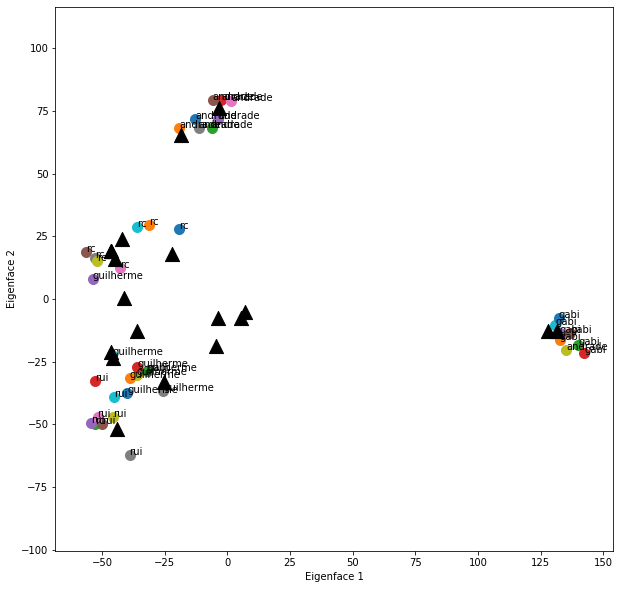

In [564]:
plt.figure(figsize=(10,10))
plt.axis('equal')
for i in range(0,40):
    imagem = train_set[i]
    x, y = np.array([identify(imagem)]).T
    plt.scatter(x,y, s=100)
    if i < 9  :
        tmp = "andrade"
    elif i < 17:
        tmp = "gabi"
    elif i < 25:
        tmp = "guilherme"
    elif i < 33:
        tmp = "rc"
    elif i < 41:
        tmp = "rui"
    else:
       tmp = "Não existe no dataset"
    
    plt.text(x, y, tmp)
    
for i in range(0,20):
    if(i < 2): tmp = "andrade"
    elif(i < 4): tmp = "gabi"
    elif(i < 6): tmp = "guilherme"
    elif(i < 8): tmp = "rc"
    elif(i < 10): tmp = "rui"
    elif(i < 14): tmp = "guilherme"
    elif(i < 18): tmp = "none"
    elif(i < 20): tmp = "rui"
    else: tmp = "nao existe"
    
    input_img = test_set[i]
    x, y = np.array([identify(input_img)]).T
    plt.scatter(x,y, marker='^', c='k', s=200)
    plt.xlabel('Eigenface 1')
    plt.ylabel('Eigenface 2')

## Outra maneira mais eficiente é fazendo a média das distancias para as mesmas imagens

In [569]:
#para cada imagem temos -> (x1,x2..x8,y1,y2..y8...)
#temos 8 distancias corrrespondentes a 8 pessoas, uma maneira de otimizar seria fazer a média de 8 em 8 e ver qual a
#menor distancia

mean_dist = np.zeros(shape = (20,5))

#por cada imagem de teste
for i in range(0,dist.shape[0]):
    #para cada ponto que representa a distancia entre imagem de teste e todas as imagens de treino
    tmp = 0;
    for p in range(0,len(dist[i])):
        #vou fazer a média dos pontos que estão associdos à mesma imagem de treino, neste caso de 8 em 8
        tmp = tmp + dist[i][p]
        tmp_2 = p+1
        if(tmp_2 == 8):
            ind = int ((tmp_2 /8)-1)
            mean_dist[i][ind] = tmp/8
            tmp = 0
        if(tmp_2 == 16):
            ind = int ((tmp_2/8)-1)
            mean_dist[i][ind] = tmp/8
            tmp = 0
        if(tmp_2 == 24):
            ind = int ((tmp_2/8)-1)
            mean_dist[i][ind] = tmp/8
            tmp = 0
        if(tmp_2 == 32):
            ind = int ((tmp_2/8)-1)
            mean_dist[i][ind] = tmp/8
            tmp = 0
        if(tmp_2 == 40):
            ind = int ((tmp_2/8)-1)
            mean_dist[i][ind] = tmp/8
            tmp = 0

mean_dist.shape

(20, 5)

In [570]:
ind = [np.argmin(x) for x in mean_dist]
ind

[0, 0, 1, 1, 2, 2, 3, 2, 4, 4, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3]

In [571]:
#Com este indice consigo ver qual o elemento
#devido à organização das pastas é possível separar o indíce desta maneira
def ind_to_name(ind):
    if ind == 0  :
        tmp = "andrade"
        #break;
    elif ind == 1:
        tmp = "gabi"
        #break;
    elif ind == 2:
        tmp = "guilherme"
        #break;
    elif ind == 3:
        tmp = "rc"
        #break;
    elif ind == 4:
        tmp = "rui"
        #break;
    else:
       tmp = "Não reconhecemos"
    return tmp

In [572]:
tmp = 1
for i in range(0,len(ind)):

    name = ind_to_name(ind[i])
    
    if(name == answer_test[i]):
        print("Image " + str(tmp) + " is ok!")
        print("Image of -> " + str(answer_test[i]))
        print("Predicted -> " + name)
        print("Distance of " + str(np.min(mean_dist[i])))
        print("\n\n")
    else:
        print("Image " + str(tmp) + " isnt ok!")
        print("Image of -> " + str(answer_test[i]))
        print("Predicted -> " + name)
        print("Distance of " + str(np.min(mean_dist[i])))
        print("\n\n")
    
    tmp+=1

Image 1 is ok!
Image of -> andrade
Predicted -> andrade
Distance of 77.62376042928373



Image 2 is ok!
Image of -> andrade
Predicted -> andrade
Distance of 54.58845844235965



Image 3 is ok!
Image of -> gabi
Predicted -> gabi
Distance of 52.277051203327616



Image 4 is ok!
Image of -> gabi
Predicted -> gabi
Distance of 44.88514664429056



Image 5 is ok!
Image of -> guilherme
Predicted -> guilherme
Distance of 46.236408550764025



Image 6 is ok!
Image of -> guilherme
Predicted -> guilherme
Distance of 71.19847191192989



Image 7 is ok!
Image of -> rc
Predicted -> rc
Distance of 72.4698069910041



Image 8 isnt ok!
Image of -> rc
Predicted -> guilherme
Distance of 71.22025189065332



Image 9 is ok!
Image of -> rui
Predicted -> rui
Distance of 67.09207372065613



Image 10 is ok!
Image of -> rui
Predicted -> rui
Distance of 56.63504568278896



Image 11 is ok!
Image of -> guilherme
Predicted -> guilherme
Distance of 79.49223274034466



Image 12 is ok!
Image of -> guilherme
Predict